## Assignment:

BONUS: build the communication graph (unweighted and undirected) among the different email senders and recipients using the NetworkX library. Find communities in this graph with community.best_partition(G) method from the community detection module. Print the most frequent 20 words used by the email authors of each community. Do these word lists look similar to what you've produced at step 3 with LDA? Can you identify clear discussion topics for each community? Discuss briefly the obtained results.

### Make the Graph 

In [209]:
import pandas as pd
import numpy as np
import networkx as nx
import math
import community
import matplotlib.pyplot as plt

In [158]:
G=nx.Graph()
emails = pd.read_csv('hillary-clinton-emails/emails.csv')
receivers = pd.read_csv('hillary-clinton-emails/EmailReceivers.csv')

emails = emails[pd.notnull(emails['SenderPersonId'])]

In [159]:
nodes2 = pd.DataFrame()

nodes2['EmailID'] = receivers['EmailId']
nodes2['ReceiverID'] = receivers['PersonId']
nodes2['SenderID'] = 'nan'

nodes2.reset_index(drop=True, inplace=True)

nodes2.head()

,EmailID,ReceiverID,SenderID
0,1,80,nan
1,2,80,nan
2,3,228,nan
3,3,80,nan
4,4,80,nan


In [156]:
len(nodes2)

9306

In [223]:
# Now we need to link the receivers (all of them) to the EmailID.
# For some reason it crashes past 9121, but that's oK - it's only 
# 185 lines, or 2%

nodes_test2 = nodes2.head(9120)
for index, row in nodes_test2.iterrows():
    nodes_test2.set_value(index, 'SenderID', emails.iloc[row['EmailID']]['SenderPersonId'])
    
nodes_test2.head()

,EmailID,ReceiverID,SenderID
0,1,80,32
1,2,80,32
2,3,228,80
3,3,80,80
4,4,80,80


In [224]:
tuples_table = nodes_test2.copy()

for index, row in tuples_table.iterrows():
    a = row['ReceiverID']
    b = int(row['SenderID'])
    G.add_edge(a,b)
#print(list(G.edges()))

In [225]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 507
Number of edges: 893
Average degree:   3.5227


### Partition the Graph 

In [234]:
partition = community.best_partition(G)
com

45

There seem to be 45 communities.

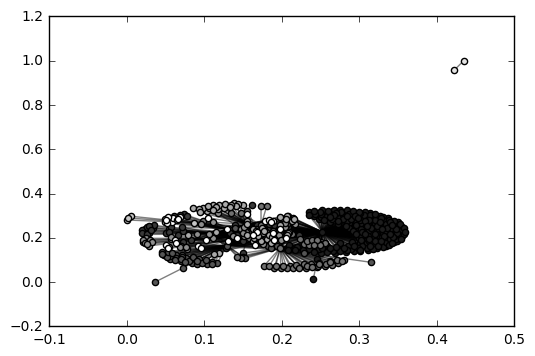

In [227]:
# from - http://perso.crans.org/aynaud/communities/

#Drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()

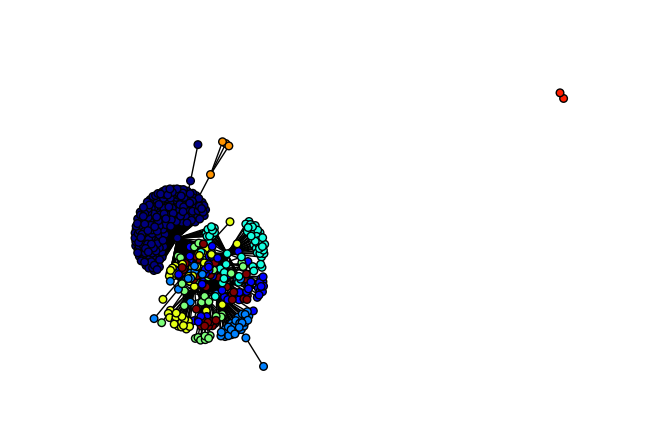

In [233]:
# from - http://ryancompton.net/2014/06/16/community-detection-and-colored-plotting-in-networkx/
values = [partition.get(node) for node in G.nodes()]
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)
plt.show()

### Extra

In [200]:
# from - http://perso.crans.org/aynaud/communities/api.html

dendo = community.generate_dendrogram(G)
for level in range(len(dendo) - 1) :
     print("partition at level", level, 
           "is", partition_at_level(dendo, level))

NameError: name 'partition_at_level' is not defined